# Quantum Fourier Transform

The QFT is an important subroutine to many quantum algorithms, most famously Shor's algorithm for factoring and the quantum phase estimation (QPE) algorithm for estimating the eigenvalues of a unitary operator [1, 2]. The QFT can be performed efficiently on a quantum computer, using only
single-qubit Hadamard gates and two-qubit controlled phase shift gates, where is the number of qubits. We first review the basics of the quantum Fourier transform, and its relation to the discrete (classical) Fourier transform. We then implement the QFT in code two ways: recursively and non-recursively. 

## Reference

[1] Wikipedia: https://en.wikipedia.org/wiki/Quantum_Fourier_transform

[2] Nielsen, Michael A., Chuang, Isaac L. (2010). Quantum Computation and Quantum Information (2nd ed.). Cambridge: Cambridge University Press.

In [27]:

import quantum_fourier_transform as qft

from braket.devices import LocalSimulator
from braket.circuits import Circuit
import matplotlib.pyplot as plt
import numpy as np

# Circuits

In [28]:
print(qft.quantum_fourier_transform(4))

T  : |0|     1     |      2      |           3           |      4      |     5     | 6  | 7  |
                                                                                              
q0 : -H-PHASE(1.57)-PHASE(0.79)---PHASE(0.39)--------------------------------------------SWAP-
        |           |             |                                                      |    
q1 : ---C-----------|-----------H-|-----------PHASE(1.57)-PHASE(0.79)---------------SWAP-|----
                    |             |           |           |                         |    |    
q2 : ---------------C-------------|-----------C-----------|-----------H-PHASE(1.57)-SWAP-|----
                                  |                       |             |                |    
q3 : -----------------------------C-----------------------C-------------C-----------H----SWAP-

T  : |0|     1     |      2      |           3           |      4      |     5     | 6  | 7  |


In [29]:
print(qft.inverse_quantum_fourier_transform(4))

T  : |    0    |1|     2      |      3       |            4            |      5       |     6      |7|
                                                                                                      
q0 : -SWAP-------------------------------------------------PHASE(-0.39)---PHASE(-0.79)-PHASE(-1.57)-H-
      |                                                    |              |            |              
q1 : -|----SWAP------------------PHASE(-0.79)-PHASE(-1.57)-|------------H-|------------C--------------
      |    |                     |            |            |              |                           
q2 : -|----SWAP---PHASE(-1.57)-H-|------------C------------|--------------C---------------------------
      |           |              |                         |                                          
q3 : -SWAP------H-C--------------C-------------------------C------------------------------------------

T  : |    0    |1|     2      |      3       |            4            |

# Local Simulator

In [30]:
nqubit=4
nshots=1000

## Example 1

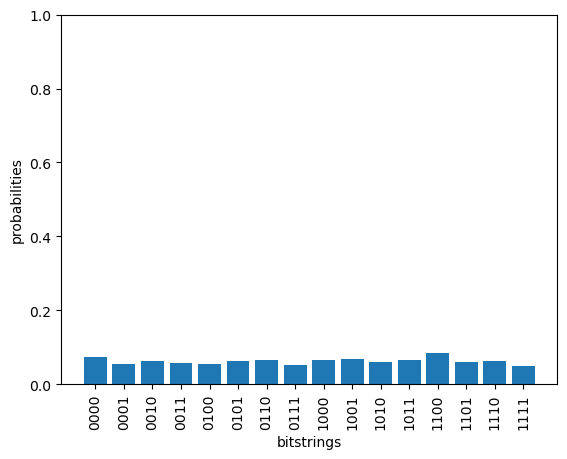

In [31]:
state_prep_cir = Circuit() 

result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=Circuit(), doInverse=False,device=LocalSimulator())

qft.postprocess_qft_results(result)

## Example 2

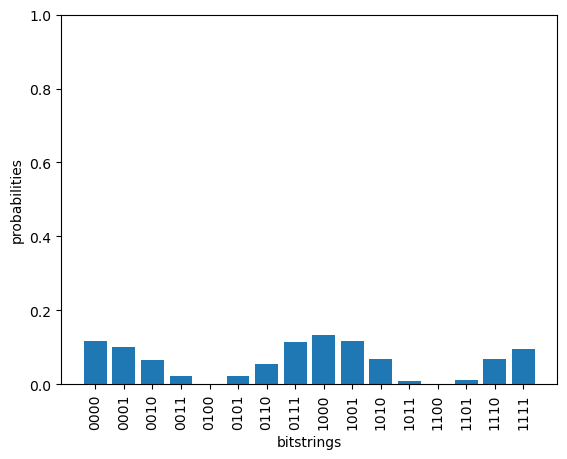

In [32]:
state_prep_cir = Circuit() 

#try changing to another qubit
h_tgt=2

result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=Circuit().h(h_tgt), doInverse=False,device=LocalSimulator())

qft.postprocess_qft_results(result)

## Example 3

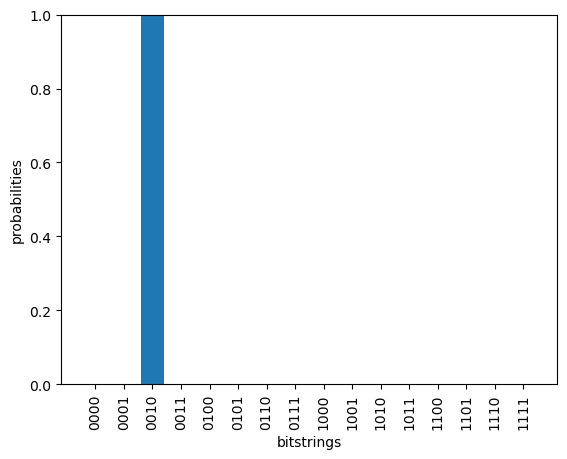

In [33]:
circ = Circuit()
qubits=range(nqubit)
circ.h(qubits)
for ii in range(nqubit - 1):
    circ.rz(ii+1, np.pi/(2**ii))
    
result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=circ, doInverse=True,device=LocalSimulator())

qft.postprocess_qft_results(result)

# Quantum devices

## Oxford QC Lucy

In [34]:
from braket.aws import AwsDevice
from braket.tracking import Tracker

t = Tracker().start()

#https://aws.amazon.com/braket/quantum-computers/
#https://docs.aws.amazon.com/braket/latest/developerguide/braket-devices.html    

device = AwsDevice('arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy')                   #OQC Lucy
# device = AwsDevice('arn:aws:braket:::device/qpu/ionq/ionQdevice')                     #IonQ
# device = AwsDevice('arn:aws:braket:::device/qpu/rigetti/Aspen-11')                    #Rigetti Aspen-11
# device = AwsDevice('arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-2')          #Rigetti Aspen M-2




## Example 1

In [ ]:
state_prep_cir = Circuit() 

result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=Circuit(), doInverse=False,device=device)

qft.postprocess_qft_results(result)

## Example 2

In [ ]:
state_prep_cir = Circuit() 

#try changing to another qubit
h_tgt=2

result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=Circuit().h(h_tgt), doInverse=False,device=device)

qft.postprocess_qft_results(result)

## Example 3

In [ ]:
circ = Circuit()
qubits=range(nqubit)
circ.h(qubits)
for ii in range(nqubit - 1):
    circ.rz(ii+1, np.pi/(2**ii))
    
result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=circ, doInverse=True,device=device)

qft.postprocess_qft_results(result)

In [ ]:
t.stop()
print("Task Summary for device: Oxford QC Lucy")
print(t.quantum_tasks_statistics())

## Rigetti Aspen 11

In [ ]:
from braket.aws import AwsDevice
from braket.tracking import Tracker

t = Tracker().start()

#https://aws.amazon.com/braket/quantum-computers/
#https://docs.aws.amazon.com/braket/latest/developerguide/braket-devices.html    

# device = AwsDevice('arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy')                   #OQC Lucy
# device = AwsDevice('arn:aws:braket:::device/qpu/ionq/ionQdevice')                     #IonQ
device = AwsDevice('arn:aws:braket:::device/qpu/rigetti/Aspen-11')                    #Rigetti Aspen-11
# device = AwsDevice('arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-2')          #Rigetti Aspen M-2




## Example 1

In [ ]:
state_prep_cir = Circuit() 

result = qft.run_quantum_fourier_transform(4,10000,state_prep_cir=Circuit(), doInverse=False,device=device)

qft.postprocess_qft_results(result)

## Example 2

In [ ]:
state_prep_cir = Circuit() 

#try changing to another qubit
h_tgt=2

result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=Circuit().h(h_tgt), doInverse=False,device=device)

qft.postprocess_qft_results(result)

## Example 3

In [ ]:
circ = Circuit()
qubits=range(nqubit)
circ.h(qubits)
for ii in range(nqubit - 1):
    circ.rz(ii+1, np.pi/(2**ii))
    
result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=circ, doInverse=True,device=device)

qft.postprocess_qft_results(result)



In [ ]:
t.stop()
print("Task Summary Rigetti Aspen 11")
print(t.quantum_tasks_statistics())

## Rigetti Aspen M2

In [ ]:
from braket.aws import AwsDevice
from braket.tracking import Tracker

t = Tracker().start()

#https://aws.amazon.com/braket/quantum-computers/
#https://docs.aws.amazon.com/braket/latest/developerguide/braket-devices.html    

# device = AwsDevice('arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy')                   #OQC Lucy
# device = AwsDevice('arn:aws:braket:::device/qpu/ionq/ionQdevice')                     #IonQ
# device = AwsDevice('arn:aws:braket:::device/qpu/rigetti/Aspen-11')                    #Rigetti Aspen-11
device = AwsDevice('arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-2')          #Rigetti Aspen M-2




## Example 1

In [ ]:
state_prep_cir = Circuit() 

result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=Circuit(), doInverse=False,device=device)

qft.postprocess_qft_results(result)

## Example 2

In [ ]:
state_prep_cir = Circuit() 

#try changing to another qubit
h_tgt=2

result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=Circuit().h(h_tgt), doInverse=False,device=device)

qft.postprocess_qft_results(result)

## Example 3

In [ ]:
circ = Circuit()
qubits=range(nqubit)
circ.h(qubits)
for ii in range(nqubit - 1):
    circ.rz(ii+1, np.pi/(2**ii))
    
result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=circ, doInverse=True,device=device)

qft.postprocess_qft_results(result)


In [ ]:
t.stop()
print("Task Summary: Rigetti M2")
print(t.quantum_tasks_statistics())

## IonQ

In [ ]:
from braket.aws import AwsDevice
from braket.tracking import Tracker

t = Tracker().start()

#https://aws.amazon.com/braket/quantum-computers/
#https://docs.aws.amazon.com/braket/latest/developerguide/braket-devices.html    

# device = AwsDevice('arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy')                   #OQC Lucy
device = AwsDevice('arn:aws:braket:::device/qpu/ionq/ionQdevice')                     #IonQ
# device = AwsDevice('arn:aws:braket:::device/qpu/rigetti/Aspen-11')                    #Rigetti Aspen-11
# device = AwsDevice('arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-2')          #Rigetti Aspen M-2




## Example 1

In [ ]:
state_prep_cir = Circuit() 

result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=Circuit(), doInverse=False,device=device)

qft.postprocess_qft_results(result)

## Example 2

In [ ]:
state_prep_cir = Circuit() 

#try changing to another qubit
h_tgt=2

result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=Circuit().h(h_tgt), doInverse=False,device=device)

qft.postprocess_qft_results(result)

## Example 3

In [ ]:
circ = Circuit()
qubits=range(nqubit)
circ.h(qubits)
for ii in range(nqubit - 1):
    circ.rz(ii+1, np.pi/(2**ii))
    
result = qft.run_quantum_fourier_transform(nqubit,nshots,state_prep_cir=circ, doInverse=True,device=device)

qft.postprocess_qft_results(result)

In [ ]:
t.stop()
print("Task Summary for device: Oxford QC Lucy")
print(t.quantum_tasks_statistics())